In [1]:
import tensorflow as tf 
import keras

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions

In [3]:
from keras import backend as K

In [4]:
iv3 = InceptionV3() #Aca se define el modelo iv3 con la red inceptionv3 ya entrenada provista por la libreria keras
#Cortesia de Google

Instructions for updating:
Colocations handled automatically by placer.
96116736/96112376 [==============================] - 260s 3us/step


In [5]:
print(iv3.summary()) #Esto muestra cada una de las capas de la red

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [6]:
from keras.preprocessing import image #Esto permite manipular imagenes

(1, 299, 299, 3)


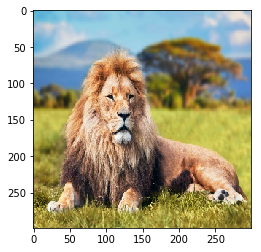

In [111]:
x = image.load_img("./leon.jpg", target_size=(299,299)) #Cargo la imagen y la reshapeo a 299x299 para que sea compatible
#con la red neuronal que pide ese tamaño de entrada

x = image.img_to_array(x) #La convierto en matriz

plt.imshow(x/255.)

x = ((x/255) - 0.5)*2 #Ahora x esta en el rango de -1 a 1 y es compatible con la red.
#la imagen ahora esta de tamaño 299,299,3 y nosotros queremos que tenga una cuarta dimension y que
#por ende sea 1,299,299,3. Ese 1 indica que solo estoy pasandole 1 imagen sola a la red.
#Si en vez de 1 fuera 7,299,299,3 entonces eso significa que le estoy pasando 7 imagenes RGB de tamnio 299x299

x1 = x.reshape(1,x.shape[0],x.shape[1],x.shape[2]) #Listo. Por que esto es asi? Esto lo podes ver en la documentacion de keras
#Siempre que uses una red nueva que ya venga entrenada, debes leer bien la documentacion

print(x1.shape)

In [112]:
y = iv3.predict(x1) #Esto da un vector de 1000 elementos. Cada elemento es una probabilidad diferente de lo que pueda
#ser la imagen. Hay que buscar el maximo

In [113]:
decode_predictions(y) #Esto ya te da cuales son los 5 maximos de la red y te pone que es cada cosa.
    

[[('n02129165', 'lion', 0.9065345),
  ('n02130308', 'cheetah', 0.0019155595),
  ('n02112137', 'chow', 0.0012760019),
  ('n03874599', 'padlock', 0.0009702451),
  ('n04328186', 'stopwatch', 0.0008315524)]]

In [91]:
from keras.applications.densenet import DenseNet201, decode_predictions #Aca trate de hacer lo mismo con otra red y ver que onda

In [92]:
red2 = DenseNet201()

82526208/82524592 [==============================] - 223s 3us/step


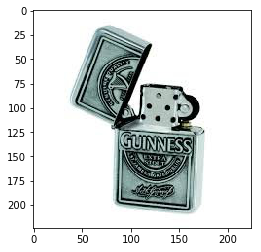

In [143]:
imagen = image.load_img("./lighter.jpg") 

x2 = image.img_to_array(imagen)

plt.imshow(x2/255.)

x2 = ((x2/255) - 0.5)*2

x2 = x2.reshape(1,x2.shape[0],x2.shape[1],x2.shape[2])

In [144]:
y2 = red2.predict(x2)

In [145]:
decode_predictions(y2)

[[('n03666591', 'lighter', 0.9996761),
  ('n02910353', 'buckle', 0.00014746354),
  ('n03916031', 'perfume', 5.637971e-05),
  ('n03494278', 'harmonica', 2.0912164e-05),
  ('n02865351', 'bolo_tie', 2.0151254e-05)]]